In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Import charging output file from SUMO
df_output = pd.read_csv('charging_output.csv', delimiter=";")
df_output

C:\Users\joey_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


# Work

In [3]:
# Make copy
df = df_output
df

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [4]:
# Filter by charging steps of work charging stations only
df_work = df.loc[df['charging_station'].str.contains("work")]
df_work

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
415,0,hh2_ev1_work,not charging,NaN,NaN,NaN,NaN
416,0,hh2_ev2_work,not charging,NaN,NaN,NaN,NaN
417,0,hh2_ev3_work,not charging,NaN,NaN,NaN,NaN
418,0,hh2_ev4_work,not charging,NaN,NaN,NaN,NaN
419,0,hh2_ev5_work,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202714,86400,hh16_ev132_work,not charging,NaN,NaN,NaN,NaN
202715,86400,hh16_ev133_work,not charging,NaN,NaN,NaN,NaN
202716,86400,hh16_ev134_work,not charging,NaN,NaN,NaN,NaN
202717,86400,hh16_ev135_work,not charging,NaN,NaN,NaN,NaN


In [5]:
# Filter second auxiliary data table by charging events at work
df_work2 = df.loc[df['status'] == "charging"]
df_work2 = df_work2.loc[df_work2['charging_station'].str.contains("work")]
df_work2

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
10529,4200,hh6_ev25_work,charging,HH_6_EV_25.0,1.94,6731.00,41000.0
11905,4800,hh6_ev2_work,charging,HH_6_EV_2.0,1.94,7077.07,41000.0
11920,4800,hh6_ev17_work,charging,HH_6_EV_17.0,1.94,7292.65,41000.0
11921,4800,hh6_ev18_work,charging,HH_6_EV_18.0,1.94,7449.49,41000.0
11923,4800,hh6_ev20_work,charging,HH_6_EV_20.0,1.94,7692.10,41000.0
...,...,...,...,...,...,...,...
69621,29400,hh12_ev33_work,charging,HH_12_EV_33.0,1.94,49388.84,50000.0
69623,29400,hh12_ev35_work,charging,HH_12_EV_35.0,1.94,48342.74,50000.0
69624,29400,hh12_ev36_work,charging,HH_12_EV_36.0,1.94,49733.68,50000.0
69627,29400,hh12_ev39_work,charging,HH_12_EV_39.0,1.94,49143.94,50000.0


In [6]:
# Filter third auxiliary data table by charging events at work
df_work3 = df.loc[df['status'] == "not charging"]
df_work3 = df_work3.loc[df_work3['charging_station'].str.contains("work")]
df_work3

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
415,0,hh2_ev1_work,not charging,NaN,NaN,NaN,NaN
416,0,hh2_ev2_work,not charging,NaN,NaN,NaN,NaN
417,0,hh2_ev3_work,not charging,NaN,NaN,NaN,NaN
418,0,hh2_ev4_work,not charging,NaN,NaN,NaN,NaN
419,0,hh2_ev5_work,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202714,86400,hh16_ev132_work,not charging,NaN,NaN,NaN,NaN
202715,86400,hh16_ev133_work,not charging,NaN,NaN,NaN,NaN
202716,86400,hh16_ev134_work,not charging,NaN,NaN,NaN,NaN
202717,86400,hh16_ev135_work,not charging,NaN,NaN,NaN,NaN


In [7]:
# Summarize steps of third auxiliary data table
df_work3 = df_work3.groupby(['step']).size().reset_index(name="count")
df_work3.head(60)

,step,count
0,0,466
1,600,466
2,1200,466
3,1800,466
4,2400,466
5,3000,466
6,3600,466
7,4200,465
8,4800,456
9,5400,422


In [8]:
# Summarize steps of second auxiliary data table
df_work2 = df_work2.groupby(['step']).size().reset_index(name="count")
df_work2

,step,count
0,4200,1
1,4800,10
2,5400,44
3,6000,73
4,6600,75
5,7200,76
6,7800,89
7,8400,144
8,9000,217
9,9600,280


In [9]:
# Summarize steps of data table 
df_work = df_work.groupby(['step']).size().reset_index(name="count")
df_work

,step,count
0,0,466
1,600,466
2,1200,466
3,1800,466
4,2400,466
...,...,...
140,84000,466
141,84600,466
142,85200,466
143,85800,466


In [10]:
# Get charging steps by substracting the number of non-charging steps
df_work['charging'] = df_work['count'] - df_work3['count']
df_work

,step,count,charging
0,0,466,0
1,600,466,0
2,1200,466,0
3,1800,466,0
4,2400,466,0
...,...,...,...
140,84000,466,0
141,84600,466,0
142,85200,466,0
143,85800,466,0


In [11]:
# Change time to hour units
df_work['charging'] = df_work['charging'] * 7
df_work["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_work.head(50)

,step,count,charging
0,06:00,466,0
1,06:10,466,0
2,06:20,466,0
3,06:30,466,0
4,06:40,466,0
5,06:50,466,0
6,07:00,466,0
7,07:10,466,7
8,07:20,466,70
9,07:30,466,308


In [12]:
# Sort by time
df_work = df_work.sort_values('step')

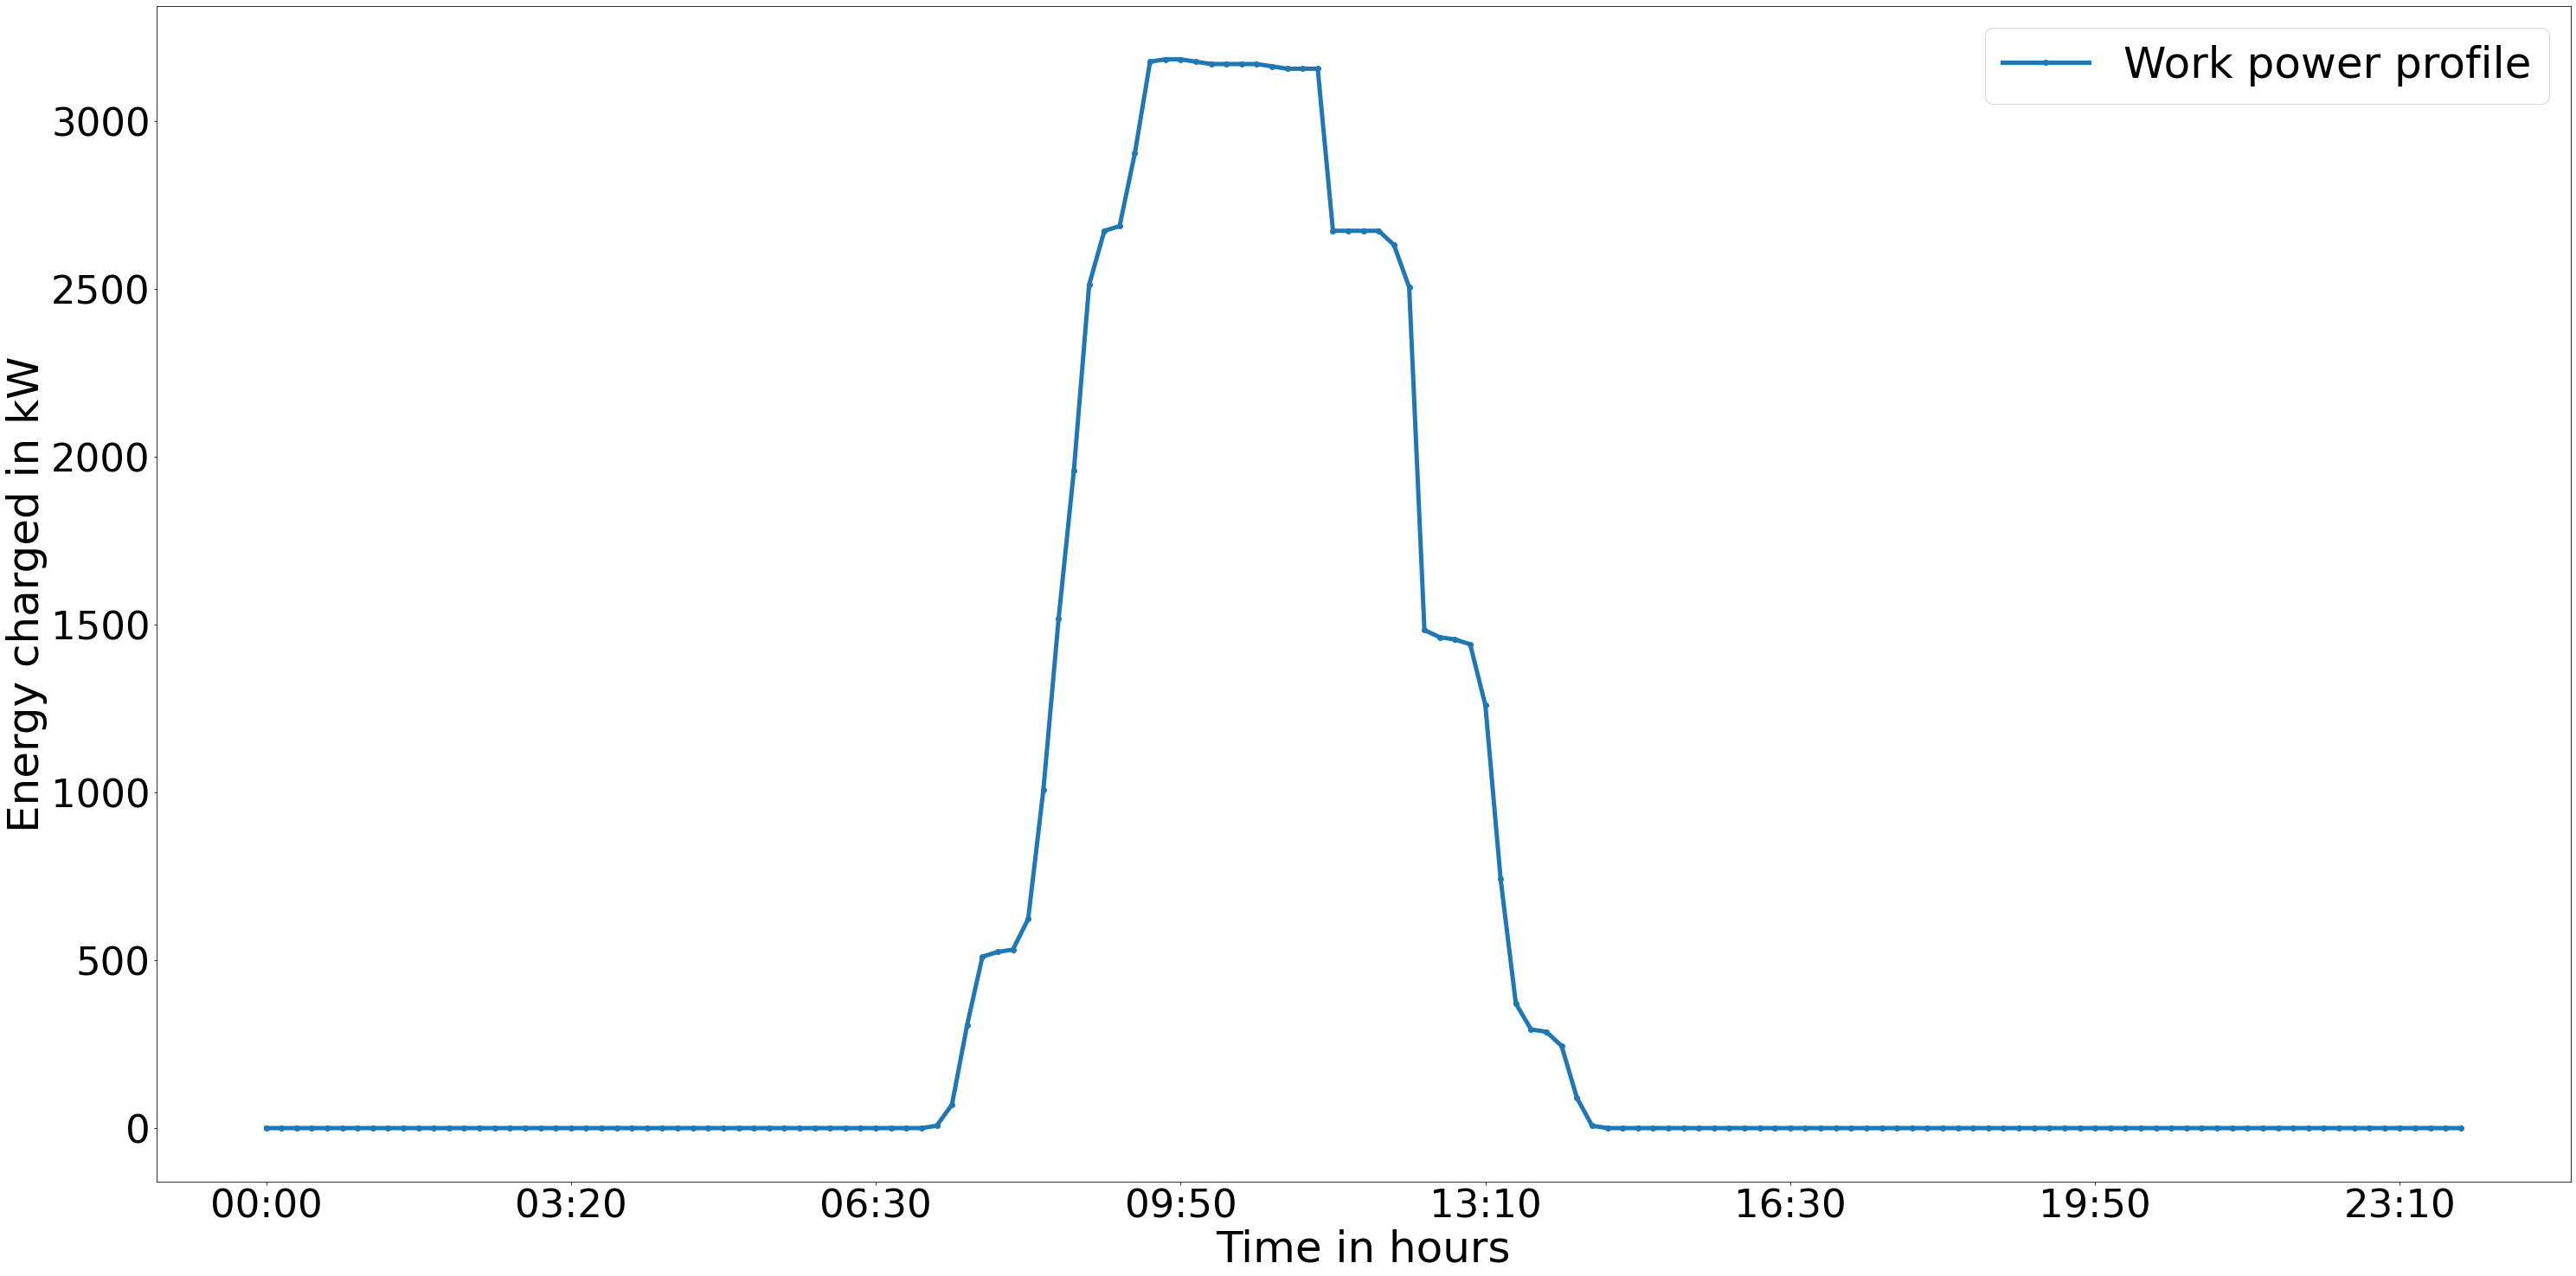

In [13]:
# Plot power profile of work
df_work.plot(x ='step', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style = 'o-')
plt.legend(['Work power profile'], fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

In [15]:
# Setting for displaying all 145 rows
pd.set_option('display.max_rows', 145)

## Clustering of work charging stations

In [22]:
# Import clustered data table of work charging stations
df = pd.read_csv('cluster_work.csv')
df

,name,lat,lon,cluster_label
0,hh-2-ev-1-work,49.489000,8.513349,132
1,hh-2-ev-2-work,49.506124,8.494003,24
2,hh-2-ev-3-work,49.512448,8.501613,122
3,hh-2-ev-4-work,49.495010,8.555355,152
4,hh-2-ev-5-work,49.503281,8.509127,99
...,...,...,...,...
461,hh-16-ev-132-work,49.453716,8.479502,282
462,hh-16-ev-133-work,49.419597,8.514778,79
463,hh-16-ev-134-work,49.540668,8.475133,145
464,hh-16-ev-135-work,49.458477,8.431383,109


In [23]:
# Sort by cluster label
df = df.sort_values('cluster_label')
df

,name,lat,lon,cluster_label
249,hh-10-ev-7-work,49.546615,8.475613,0
42,hh-2-ev-43-work,49.448231,8.520632,1
182,hh-8-ev-13-work,49.476452,8.469619,2
43,hh-2-ev-44-work,49.476539,8.471029,2
133,hh-4-ev-65-work,49.476209,8.470103,2
...,...,...,...,...
454,hh-16-ev-125-work,49.546062,8.469849,345
309,hh-12-ev-33-work,49.504786,8.536620,346
100,hh-4-ev-32-work,49.477395,8.453594,347
269,hh-10-ev-27-work,49.484616,8.479885,348


In [25]:
# Select cluster number 154 and 250
df_1 = df.loc[(df['cluster_label'] == 154) | (df['cluster_label'] == 250)]
df_1

,name,lat,lon,cluster_label
273,hh-10-ev-31-work,49.480089,8.437048,154
419,hh-16-ev-90-work,49.479683,8.437185,154
214,hh-8-ev-45-work,49.479171,8.438099,154
403,hh-16-ev-74-work,49.475013,8.433548,250


In [27]:
df_cluster = df_output
df_cluster

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [28]:
# Filter by charging steps from hh10_ev31_work
df_cluster = df_cluster.loc[df_cluster['status'] == "charging"]
df_cluster = df_cluster[df_cluster['charging_station'] == "hh10_ev31_work"]
df_cluster

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
14991,6000,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,9439.89,50000.0
16390,6600,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,10606.55,50000.0
17789,7200,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,11773.22,50000.0
19188,7800,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,12939.89,50000.0
20587,8400,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,14106.55,50000.0
21986,9000,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,15273.22,50000.0
23385,9600,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,16439.89,50000.0
24784,10200,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,17606.55,50000.0
26183,10800,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,18773.22,50000.0
27582,11400,hh10_ev31_work,charging,HH_10_EV_31.0,1.94,19939.89,50000.0


In [29]:
# Group by steps
df_cluster = df_cluster.groupby(['step']).size().reset_index(name="count")
df_cluster

,step,count
0,6000,1
1,6600,1
2,7200,1
3,7800,1
4,8400,1
5,9000,1
6,9600,1
7,10200,1
8,10800,1
9,11400,1


In [30]:
# Change into kW unit
df_cluster['charging'] = df_cluster['count'] * 7
df_cluster = df_cluster.drop(df_cluster.columns[[1]], axis=1)
df_cluster

,step,charging
0,6000,7
1,6600,7
2,7200,7
3,7800,7
4,8400,7
5,9000,7
6,9600,7
7,10200,7
8,10800,7
9,11400,7


In [31]:
# Add start and end for better visualization
new_row1 = {'step':5400, 'charging':0}
new_row2 = {'step':4800, 'charging':0}
new_row3 = {'step':27000, 'charging':0}
new_row4 = {'step':27600, 'charging':0}

new_row5 = {'step':4200, 'charging':0}
new_row11 = {'step':3600, 'charging':0}
new_row6 = {'step':3000, 'charging':0}
new_row7 = {'step':2400, 'charging':0}
new_row8 = {'step':1800, 'charging':0}
new_row9 = {'step':1200, 'charging':0}
new_row10 = {'step':600, 'charging':0}
new_row12 = {'step':0, 'charging':0}

new_row13 = {'step':28200, 'charging':0}
new_row14 = {'step':28800, 'charging':0}
new_row15 = {'step':29400, 'charging':0}
new_row16 = {'step':30000, 'charging':0}
new_row17 = {'step':30600, 'charging':0}
new_row18 = {'step':31200, 'charging':0}
new_row19 = {'step':31800, 'charging':0}
new_row20 = {'step':32400, 'charging':0}


#append row to the dataframe
df_cluster = df_cluster.append(new_row1, ignore_index=True)
df_cluster = df_cluster.append(new_row2, ignore_index=True)
df_cluster = df_cluster.append(new_row3, ignore_index=True)
df_cluster = df_cluster.append(new_row4, ignore_index=True)

df_cluster = df_cluster.append(new_row5, ignore_index=True)
df_cluster = df_cluster.append(new_row6, ignore_index=True)
df_cluster = df_cluster.append(new_row7, ignore_index=True)
df_cluster = df_cluster.append(new_row8, ignore_index=True)
df_cluster = df_cluster.append(new_row9, ignore_index=True)
df_cluster = df_cluster.append(new_row10, ignore_index=True)
df_cluster = df_cluster.append(new_row11, ignore_index=True)
df_cluster = df_cluster.append(new_row12, ignore_index=True)

df_cluster = df_cluster.append(new_row13, ignore_index=True)
df_cluster = df_cluster.append(new_row14, ignore_index=True)
df_cluster = df_cluster.append(new_row15, ignore_index=True)
df_cluster = df_cluster.append(new_row16, ignore_index=True)
df_cluster = df_cluster.append(new_row17, ignore_index=True)
df_cluster = df_cluster.append(new_row18, ignore_index=True)
df_cluster = df_cluster.append(new_row19, ignore_index=True)
df_cluster = df_cluster.append(new_row20, ignore_index=True)
df_cluster

,step,charging
0,6000,7
1,6600,7
2,7200,7
3,7800,7
4,8400,7
5,9000,7
6,9600,7
7,10200,7
8,10800,7
9,11400,7


In [32]:
# Sort by steps
df_cluster = df_cluster.sort_values('step')
df_cluster

,step,charging
46,0,0
44,600,0
43,1200,0
42,1800,0
41,2400,0
40,3000,0
45,3600,0
39,4200,0
36,4800,0
35,5400,0


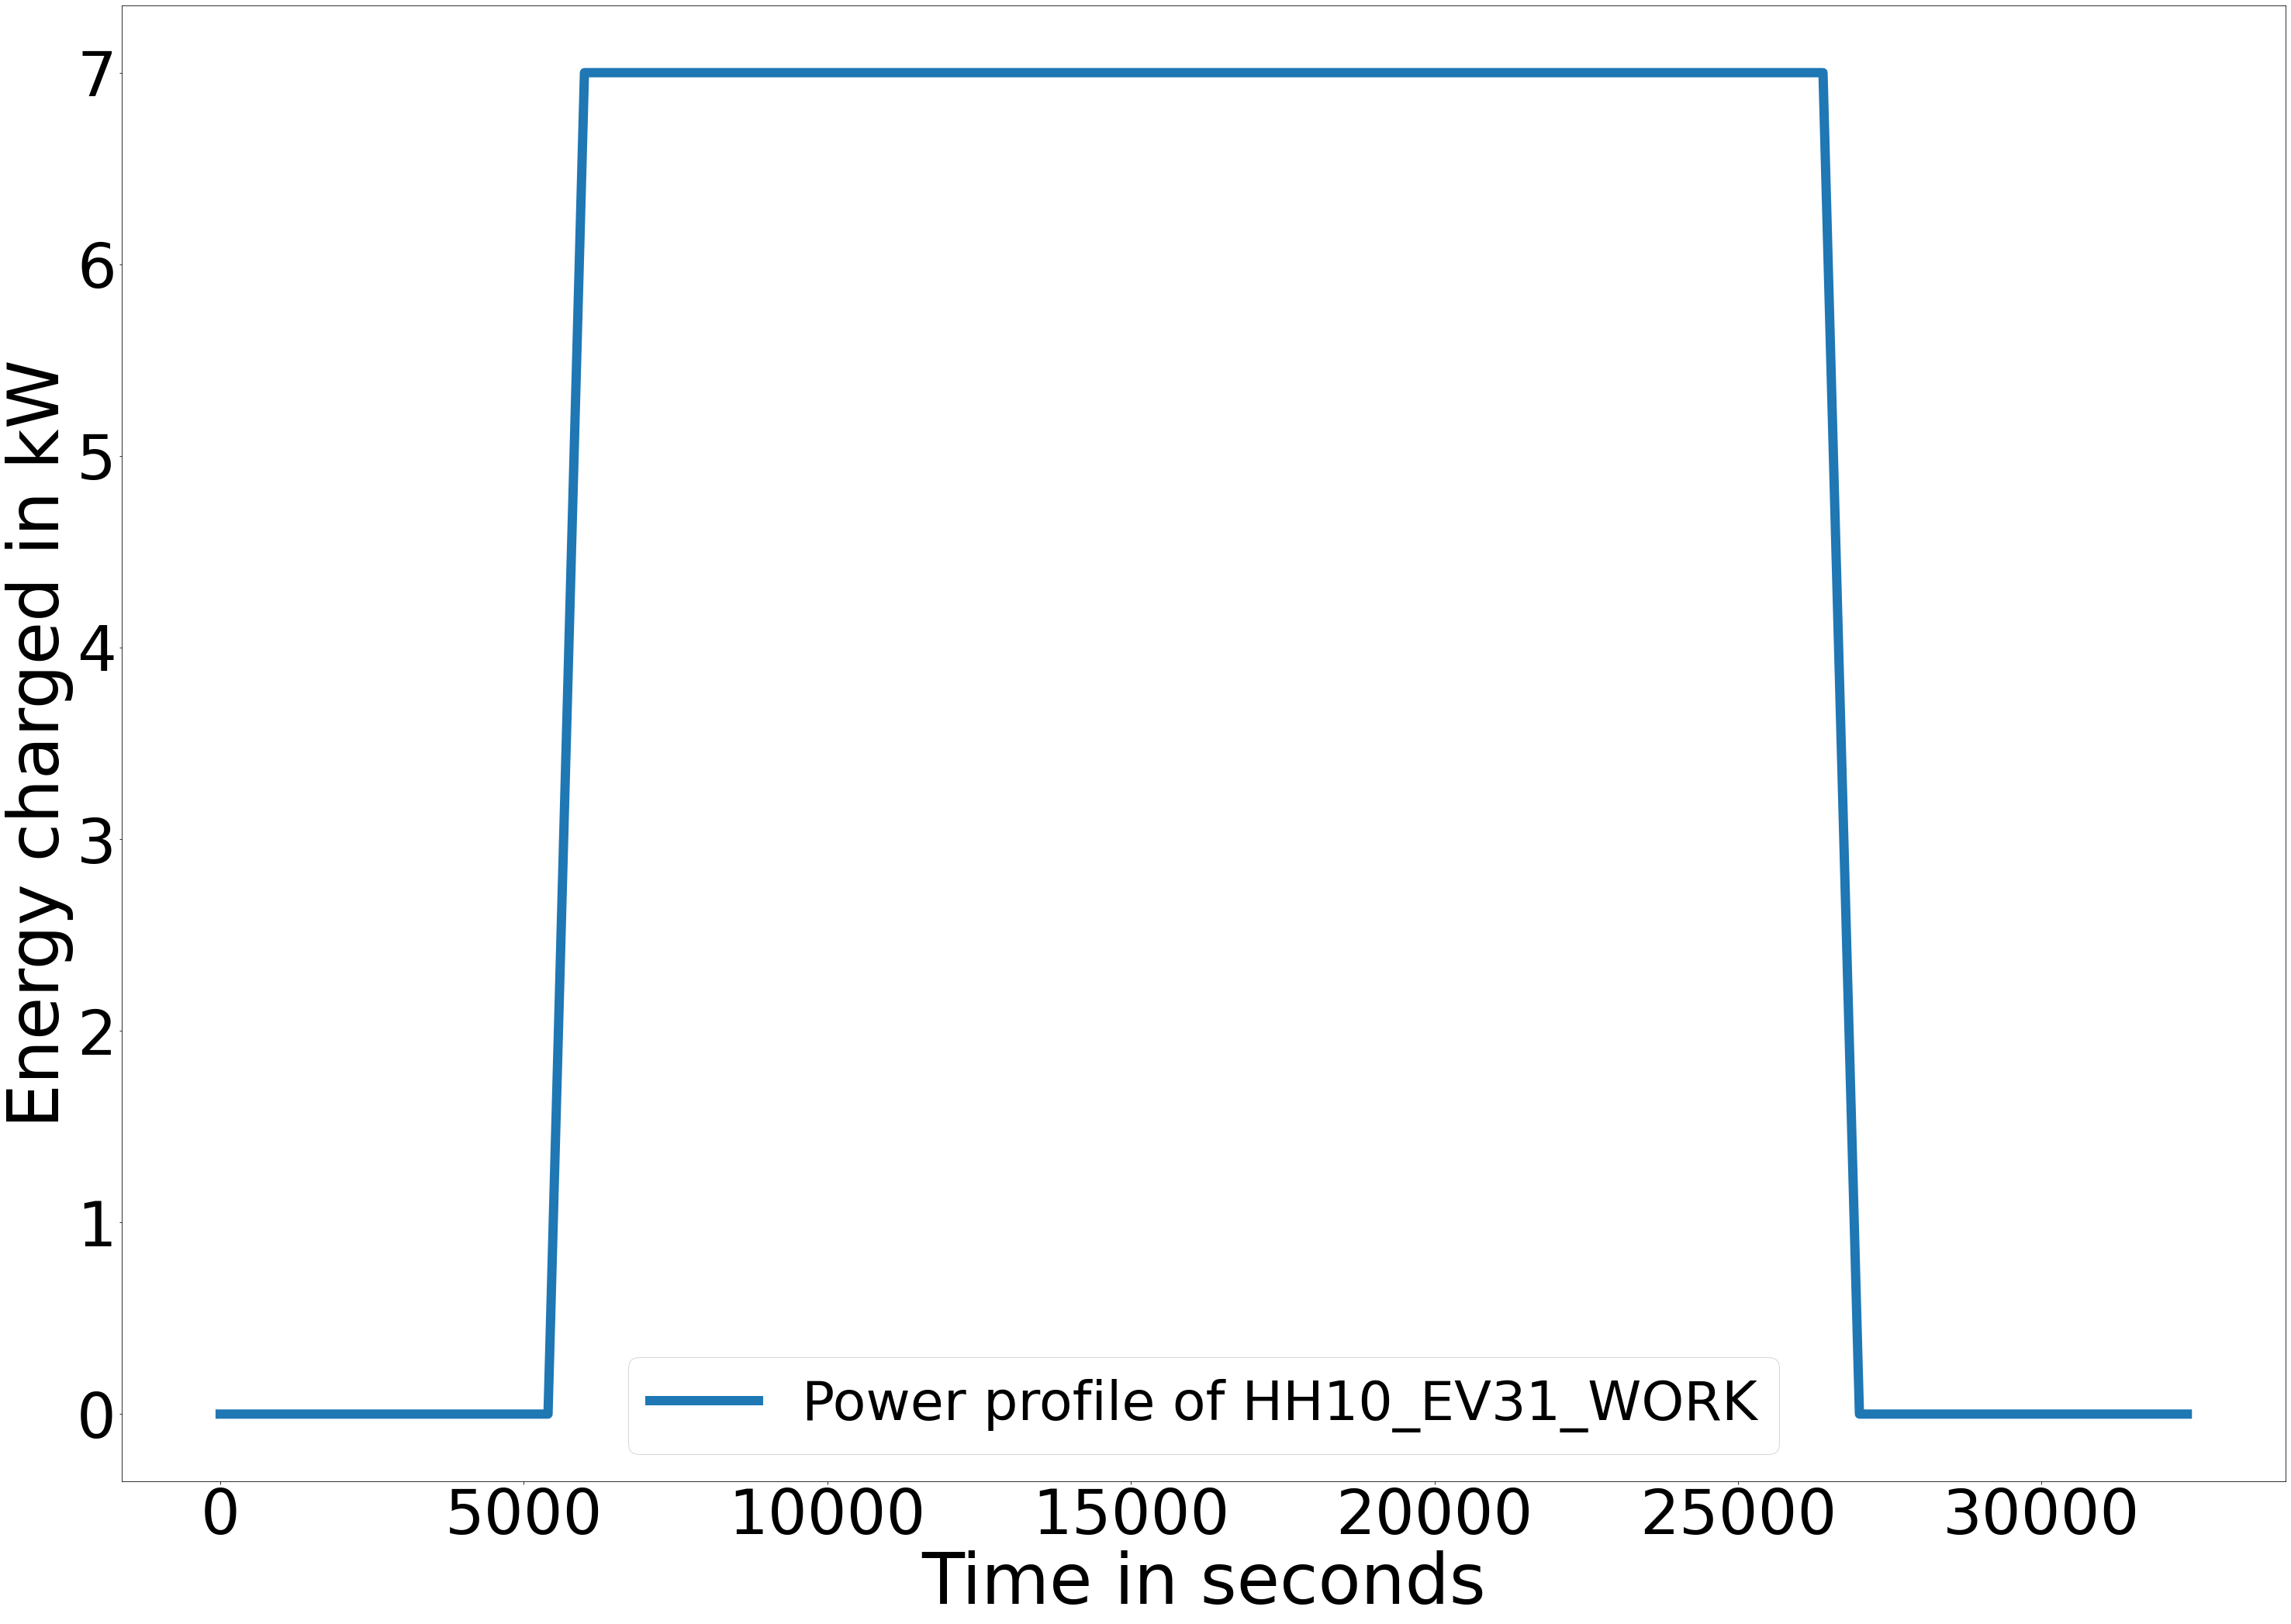

In [33]:
# Plot power profile of charging station
df_cluster.plot(x ='step', y='charging', kind = 'line', lw = 12, figsize=(50,35), fontsize=80, style='o-')
plt.legend(['Power profile of HH10_EV31_WORK'], fontsize=70)
plt.xlabel('Time in seconds', fontsize=90)
plt.ylabel('Energy charged in kW', fontsize=90)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [34]:
# The same process for hh16_ev90_work
df_cluster2 = df_output
df_cluster2 = df_cluster2.loc[df_cluster2['status'] == "charging"]
df_cluster2 = df_cluster2[df_cluster2['charging_station'] == "hh16_ev90_work"]
df_cluster2 = df_cluster2.groupby(['step']).size().reset_index(name="count")
df_cluster2['charging'] = df_cluster2['count'] * 7
df_cluster2 = df_cluster2.drop(df_cluster2.columns[[1]], axis=1)
df_cluster2

,step,charging
0,10200,7
1,10800,7
2,11400,7
3,12000,7
4,12600,7
5,13200,7
6,13800,7
7,14400,7
8,15000,7
9,15600,7


In [35]:
new_row1 = {'step':9600, 'charging':0}
new_row2 = {'step':9000, 'charging':0}
new_row3 = {'step':23400, 'charging':0}
new_row4 = {'step':24000, 'charging':0}
#append row to the dataframe
df_cluster2 = df_cluster2.append(new_row1, ignore_index=True)
df_cluster2 = df_cluster2.append(new_row2, ignore_index=True)
df_cluster2 = df_cluster2.append(new_row3, ignore_index=True)
df_cluster2 = df_cluster2.append(new_row4, ignore_index=True)
df_cluster2 = df_cluster2.sort_values('step')
df_cluster2

,step,charging
23,9000,0
22,9600,0
0,10200,7
1,10800,7
2,11400,7
3,12000,7
4,12600,7
5,13200,7
6,13800,7
7,14400,7


In [66]:
# Change time to hours
dft4 = df_cluster2
dft4["step2"] = ["08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40"]
dft4 = dft4.sort_values('step2')

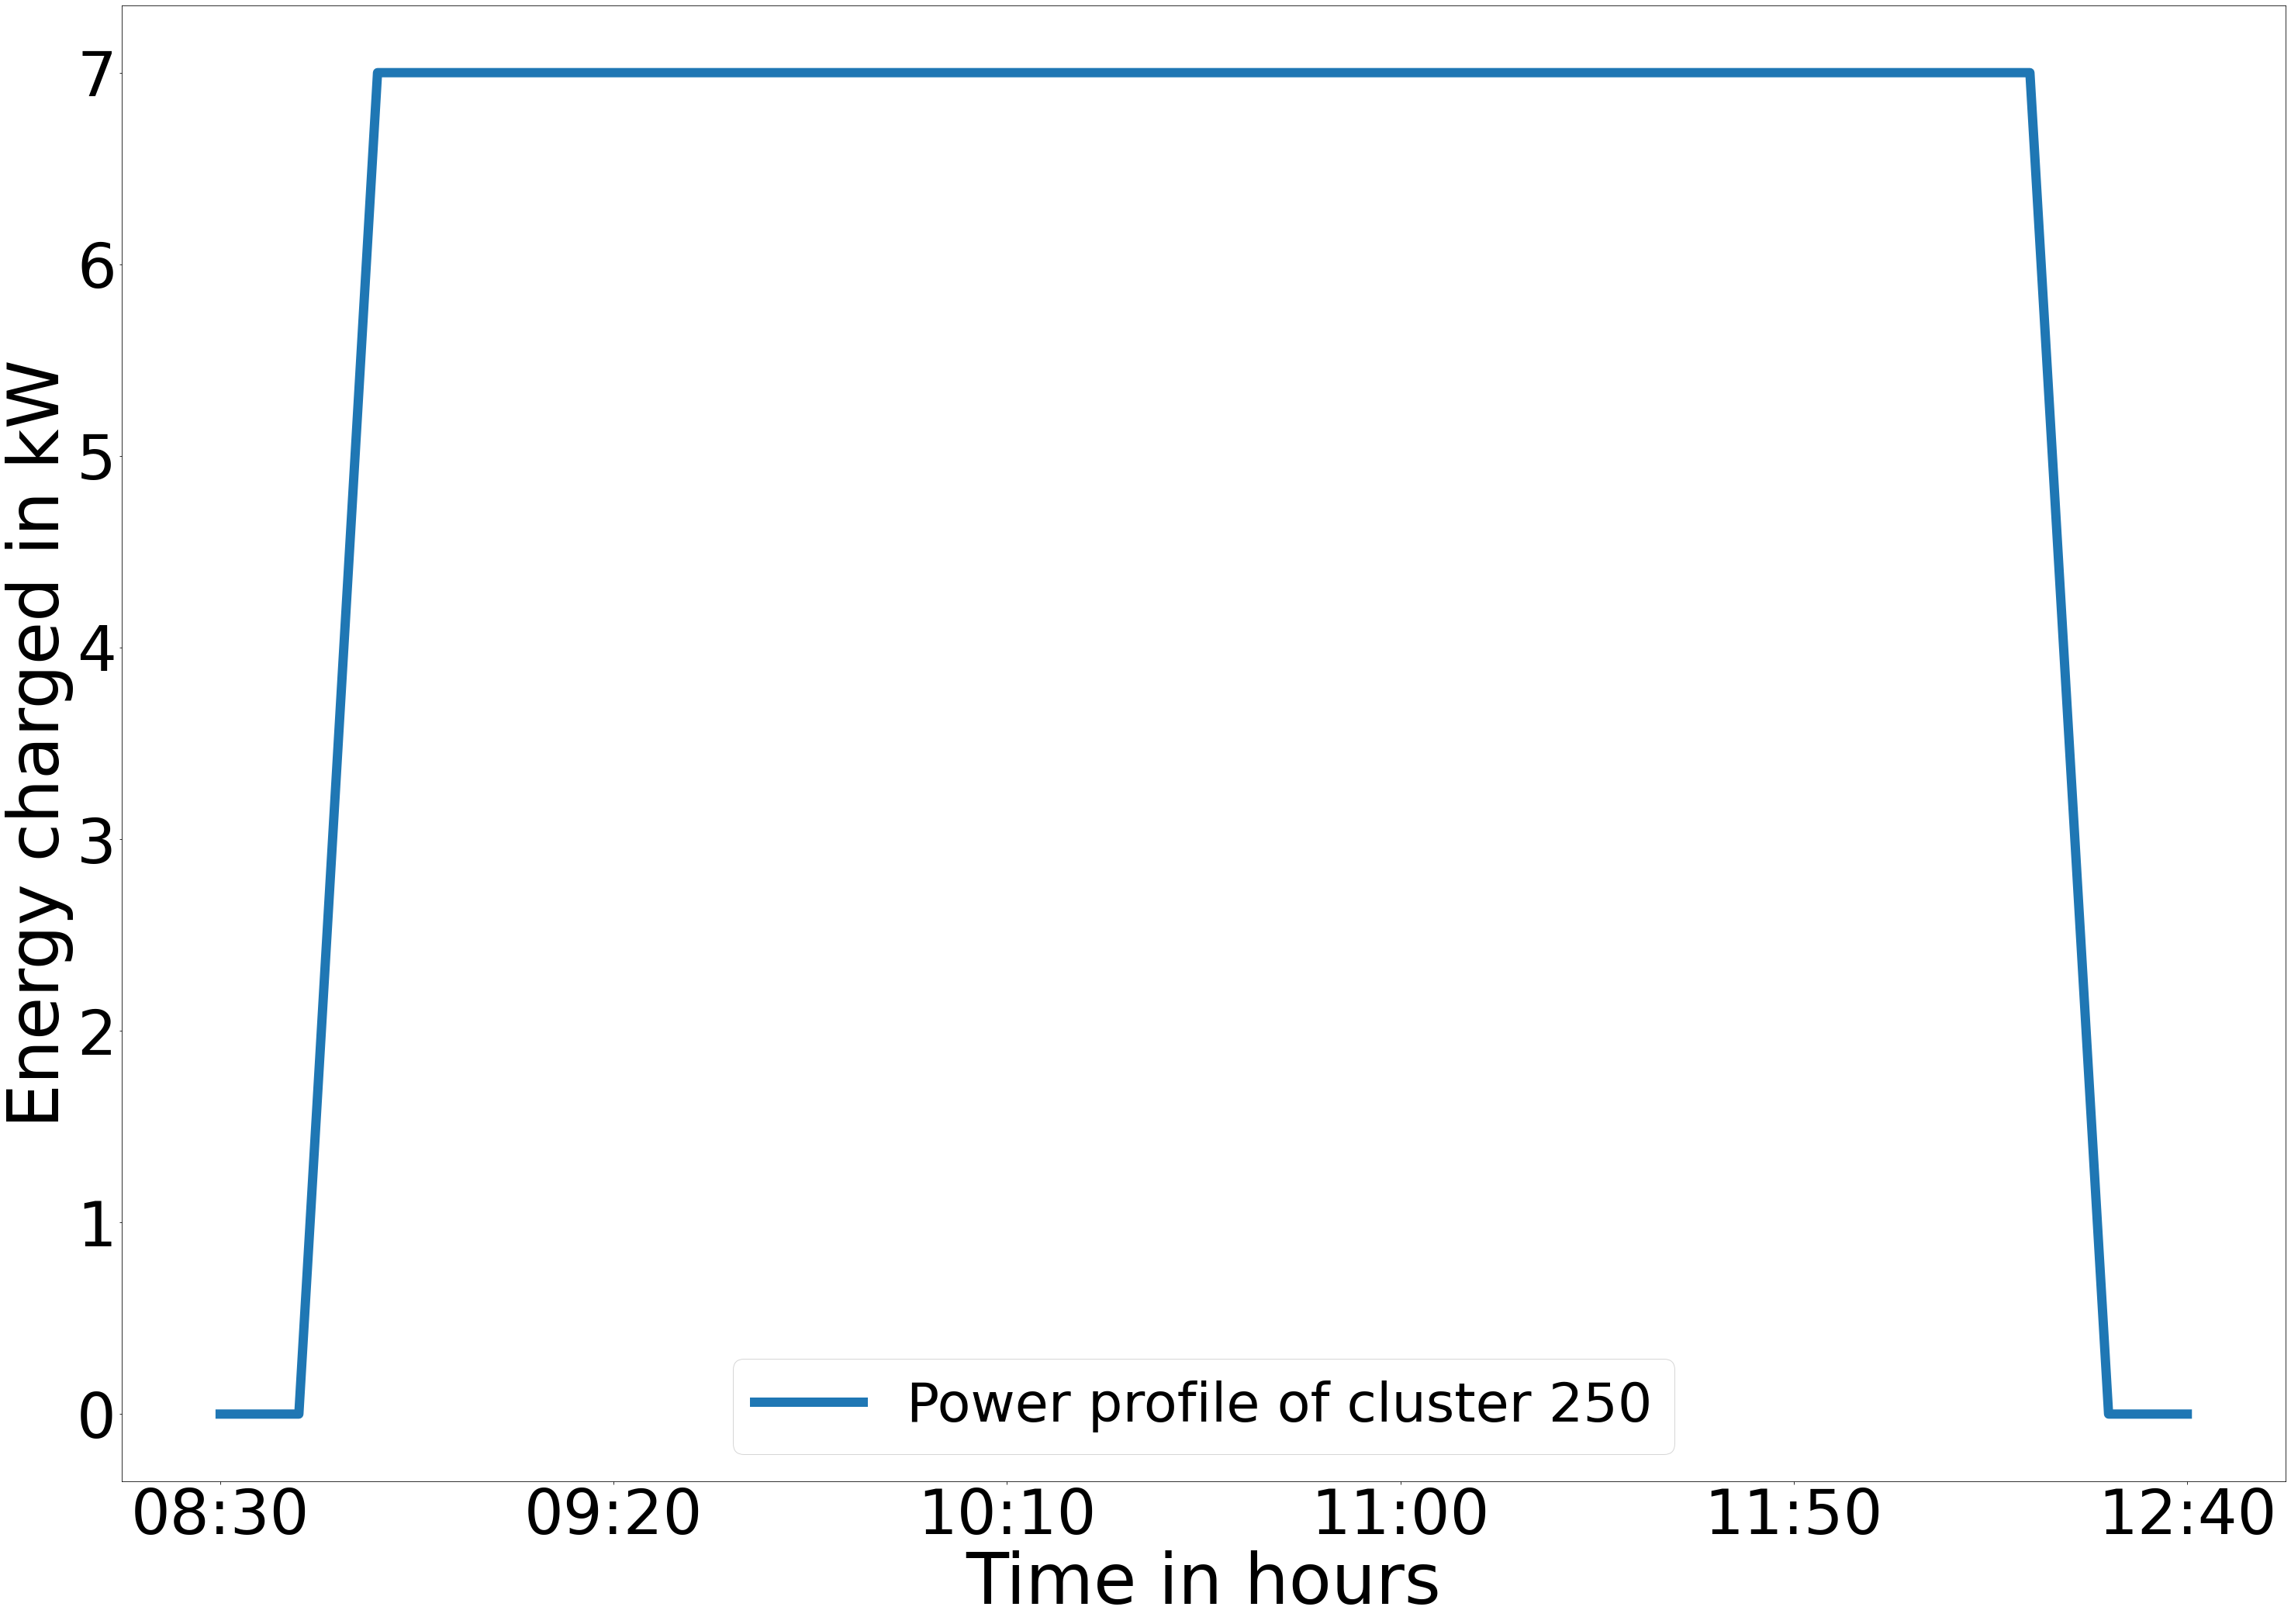

In [70]:
# Plot power profile of cluster 250
dft4.plot(x ='step2', y='charging', kind = 'line', lw = 12, figsize=(50,35), fontsize=80, style='o-')
plt.legend(['Power profile of cluster 250'], fontsize=70)
plt.xlabel('Time in hours', fontsize=90)
plt.ylabel('Energy charged in kW', fontsize=90)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [37]:
# The same process for hh8_ev45_work
df_cluster3 = df_output
df_cluster3 = df_cluster3.loc[df_cluster3['status'] == "charging"]
df_cluster3 = df_cluster3[df_cluster3['charging_station'] == "hh8_ev45_work"]
df_cluster3 = df_cluster3.groupby(['step']).size().reset_index(name="count")
df_cluster3['charging'] = df_cluster3['count'] * 7
df_cluster3 = df_cluster3.drop(df_cluster3.columns[[1]], axis=1)
df_cluster3

,step,charging
0,12600,7
1,13200,7
2,13800,7
3,14400,7
4,15000,7
5,15600,7
6,16200,7
7,16800,7
8,17400,7
9,18000,7


In [38]:
new_row1 = {'step':12000, 'charging':0}
new_row2 = {'step':11400, 'charging':0}
new_row3 = {'step':19800, 'charging':0}
new_row4 = {'step':20400, 'charging':0}
#append row to the dataframe
df_cluster3 = df_cluster3.append(new_row1, ignore_index=True)
df_cluster3 = df_cluster3.append(new_row2, ignore_index=True)
df_cluster3 = df_cluster3.append(new_row3, ignore_index=True)
df_cluster3 = df_cluster3.append(new_row4, ignore_index=True)
df_cluster3 = df_cluster3.sort_values('step')
df_cluster3

,step,charging
13,11400,0
12,12000,0
0,12600,7
1,13200,7
2,13800,7
3,14400,7
4,15000,7
5,15600,7
6,16200,7
7,16800,7


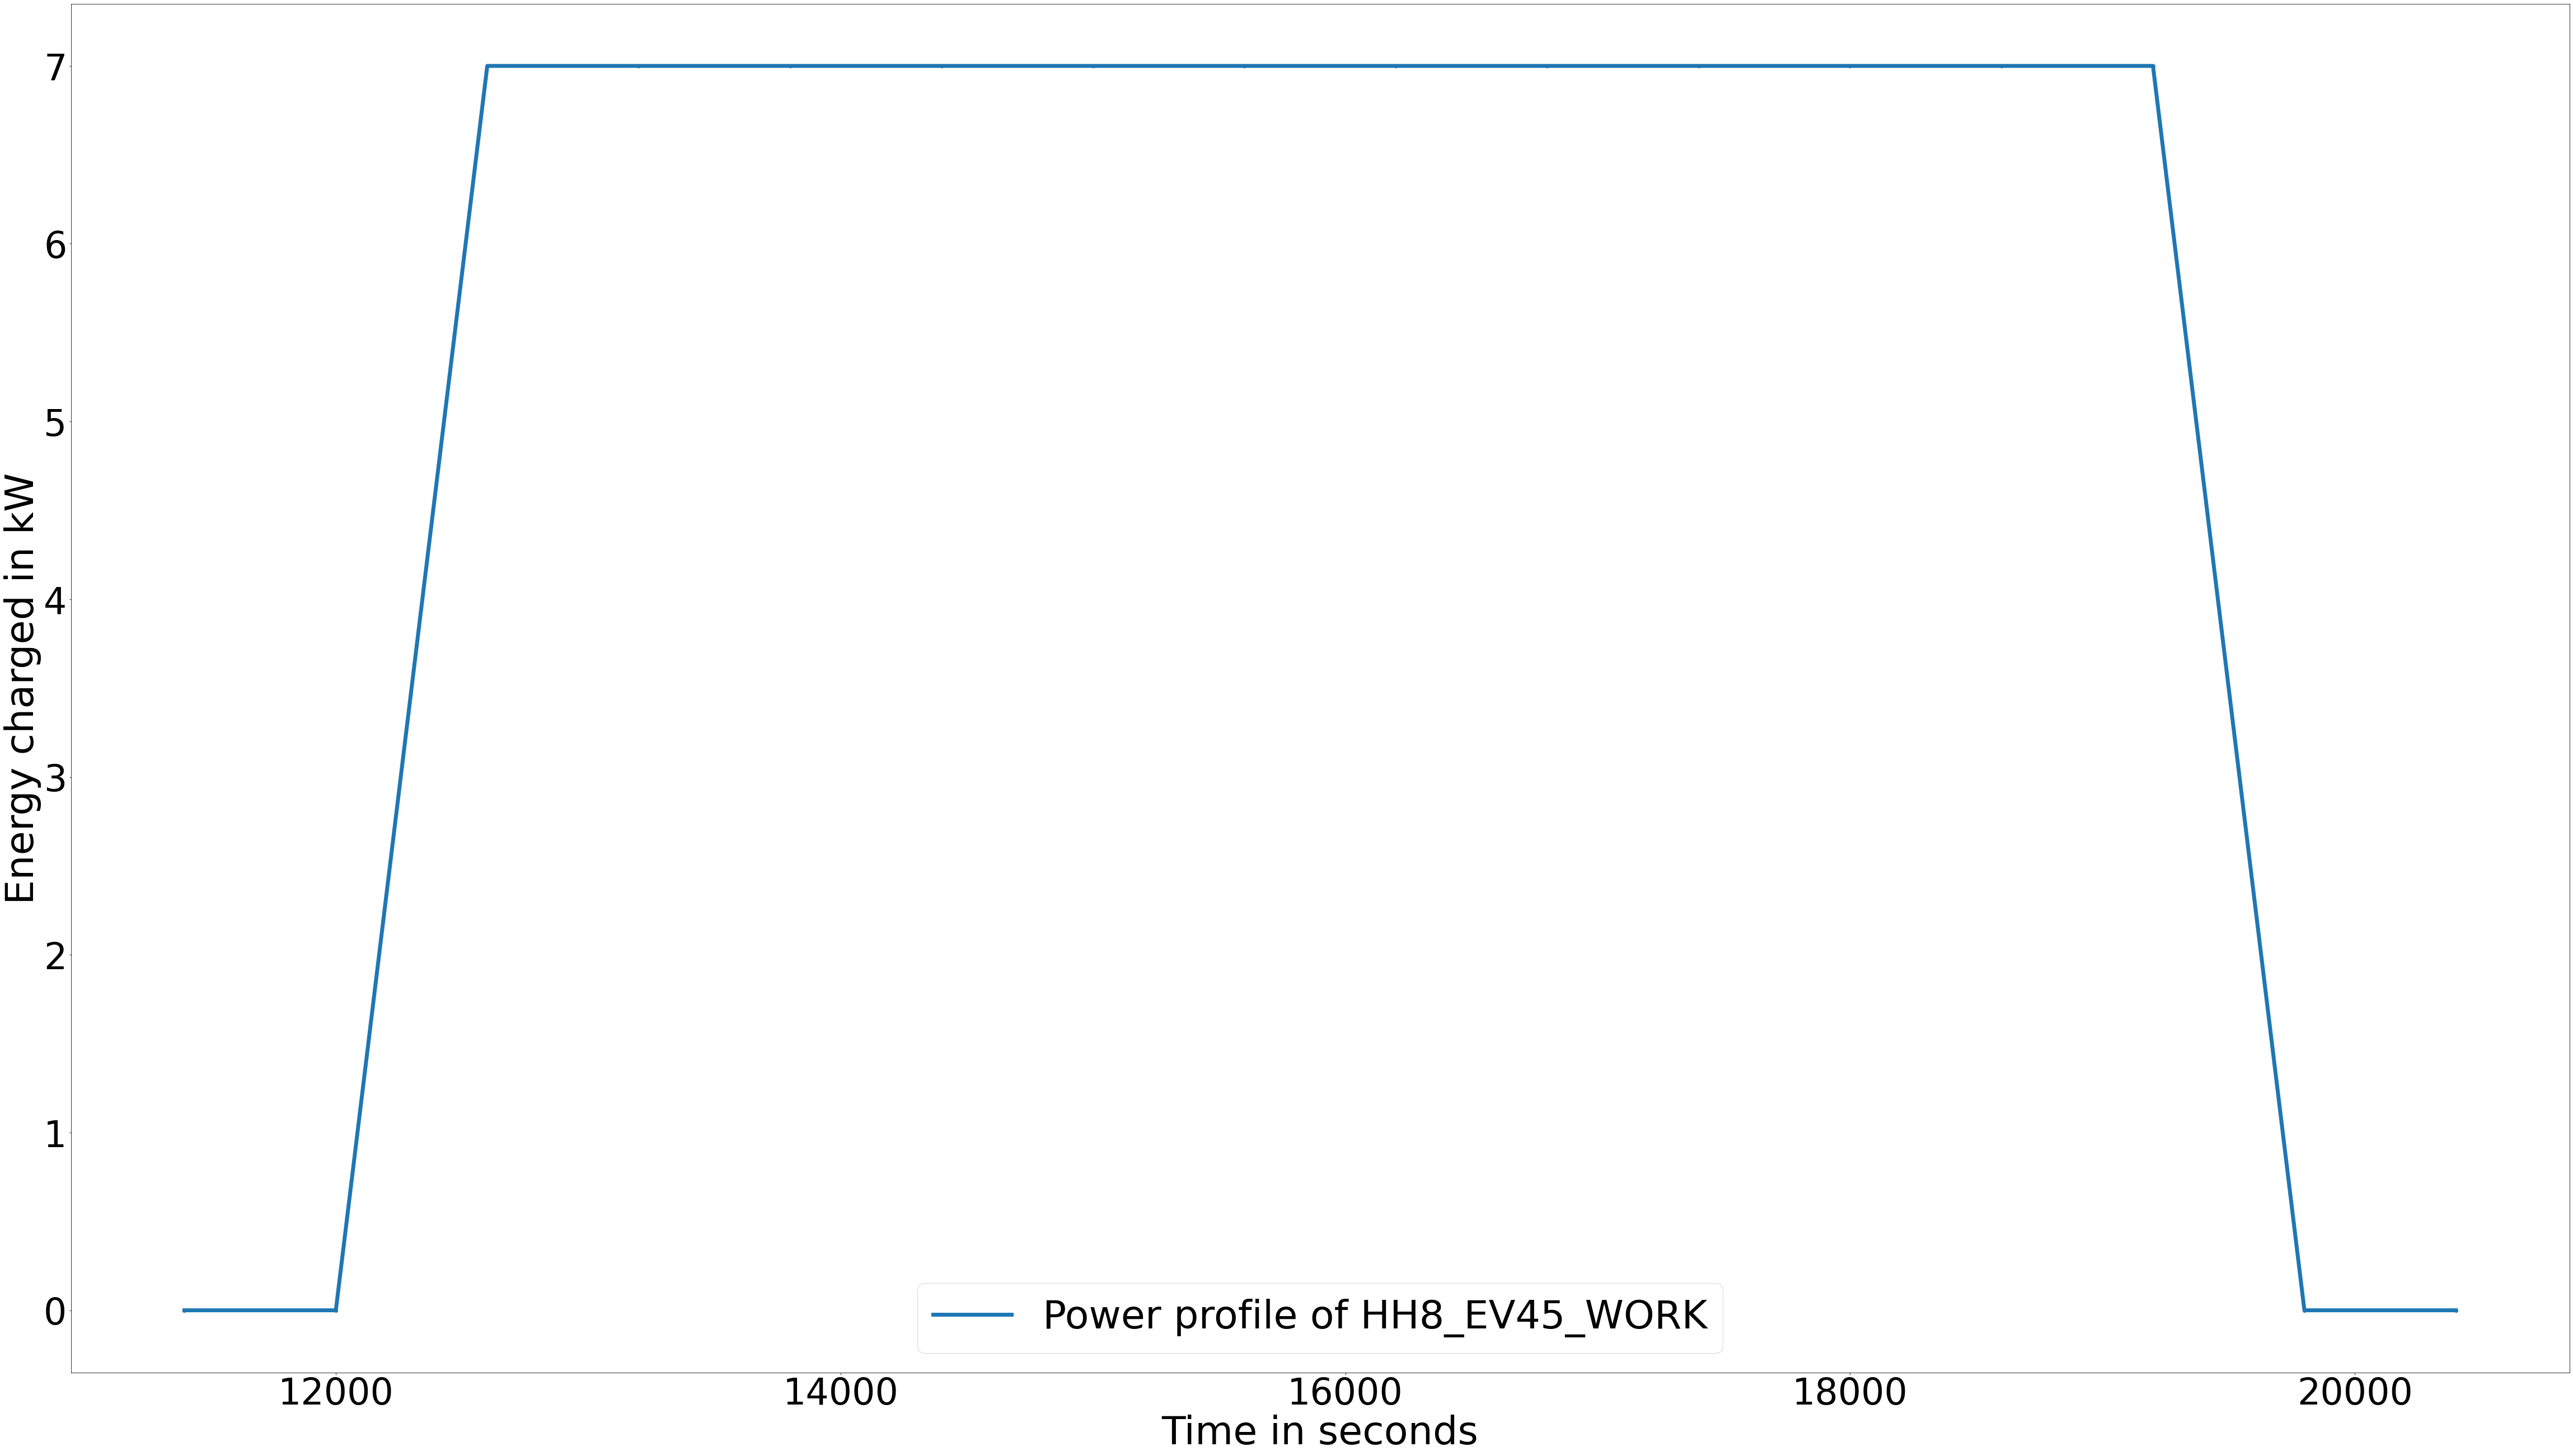

In [39]:
df_cluster3.plot(x ='step', y='charging', kind = 'line', lw = 7, figsize=(80,45), fontsize=65, style='o-')
plt.legend(['Power profile of HH8_EV45_WORK'], fontsize=70)
plt.xlabel('Time in seconds', fontsize=70)
plt.ylabel('Energy charged in kW', fontsize=70)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [40]:
# Combine the three charging stations of cluster 154
df_154 = pd.concat([df_cluster, df_cluster2, df_cluster3])
df_154

,step,charging
46,0,0
44,600,0
43,1200,0
42,1800,0
41,2400,0
40,3000,0
45,3600,0
39,4200,0
36,4800,0
35,5400,0


In [41]:
# Sort by steps
df_154 = df_154.sort_values('step')
df_154

,step,charging
46,0,0
44,600,0
43,1200,0
42,1800,0
41,2400,0
40,3000,0
45,3600,0
39,4200,0
36,4800,0
35,5400,0


In [42]:
# Group by steps
df_154 = df_154.groupby('step').sum()
df_154

,charging
step,
0,0
600,0
1200,0
1800,0
2400,0
3000,0
3600,0
4200,0
4800,0


In [55]:
# Change time to hours
dft1 = df_154
dft1["step2"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00"]
dft1.sort_values("step2")
dft1

,charging,step2
step,,
0,0,06:00
600,0,06:10
1200,0,06:20
1800,0,06:30
2400,0,06:40
3000,0,06:50
3600,0,07:00
4200,0,07:10
4800,0,07:20


In [56]:
# Sort by steps
dft1= dft1.sort_values('step2')

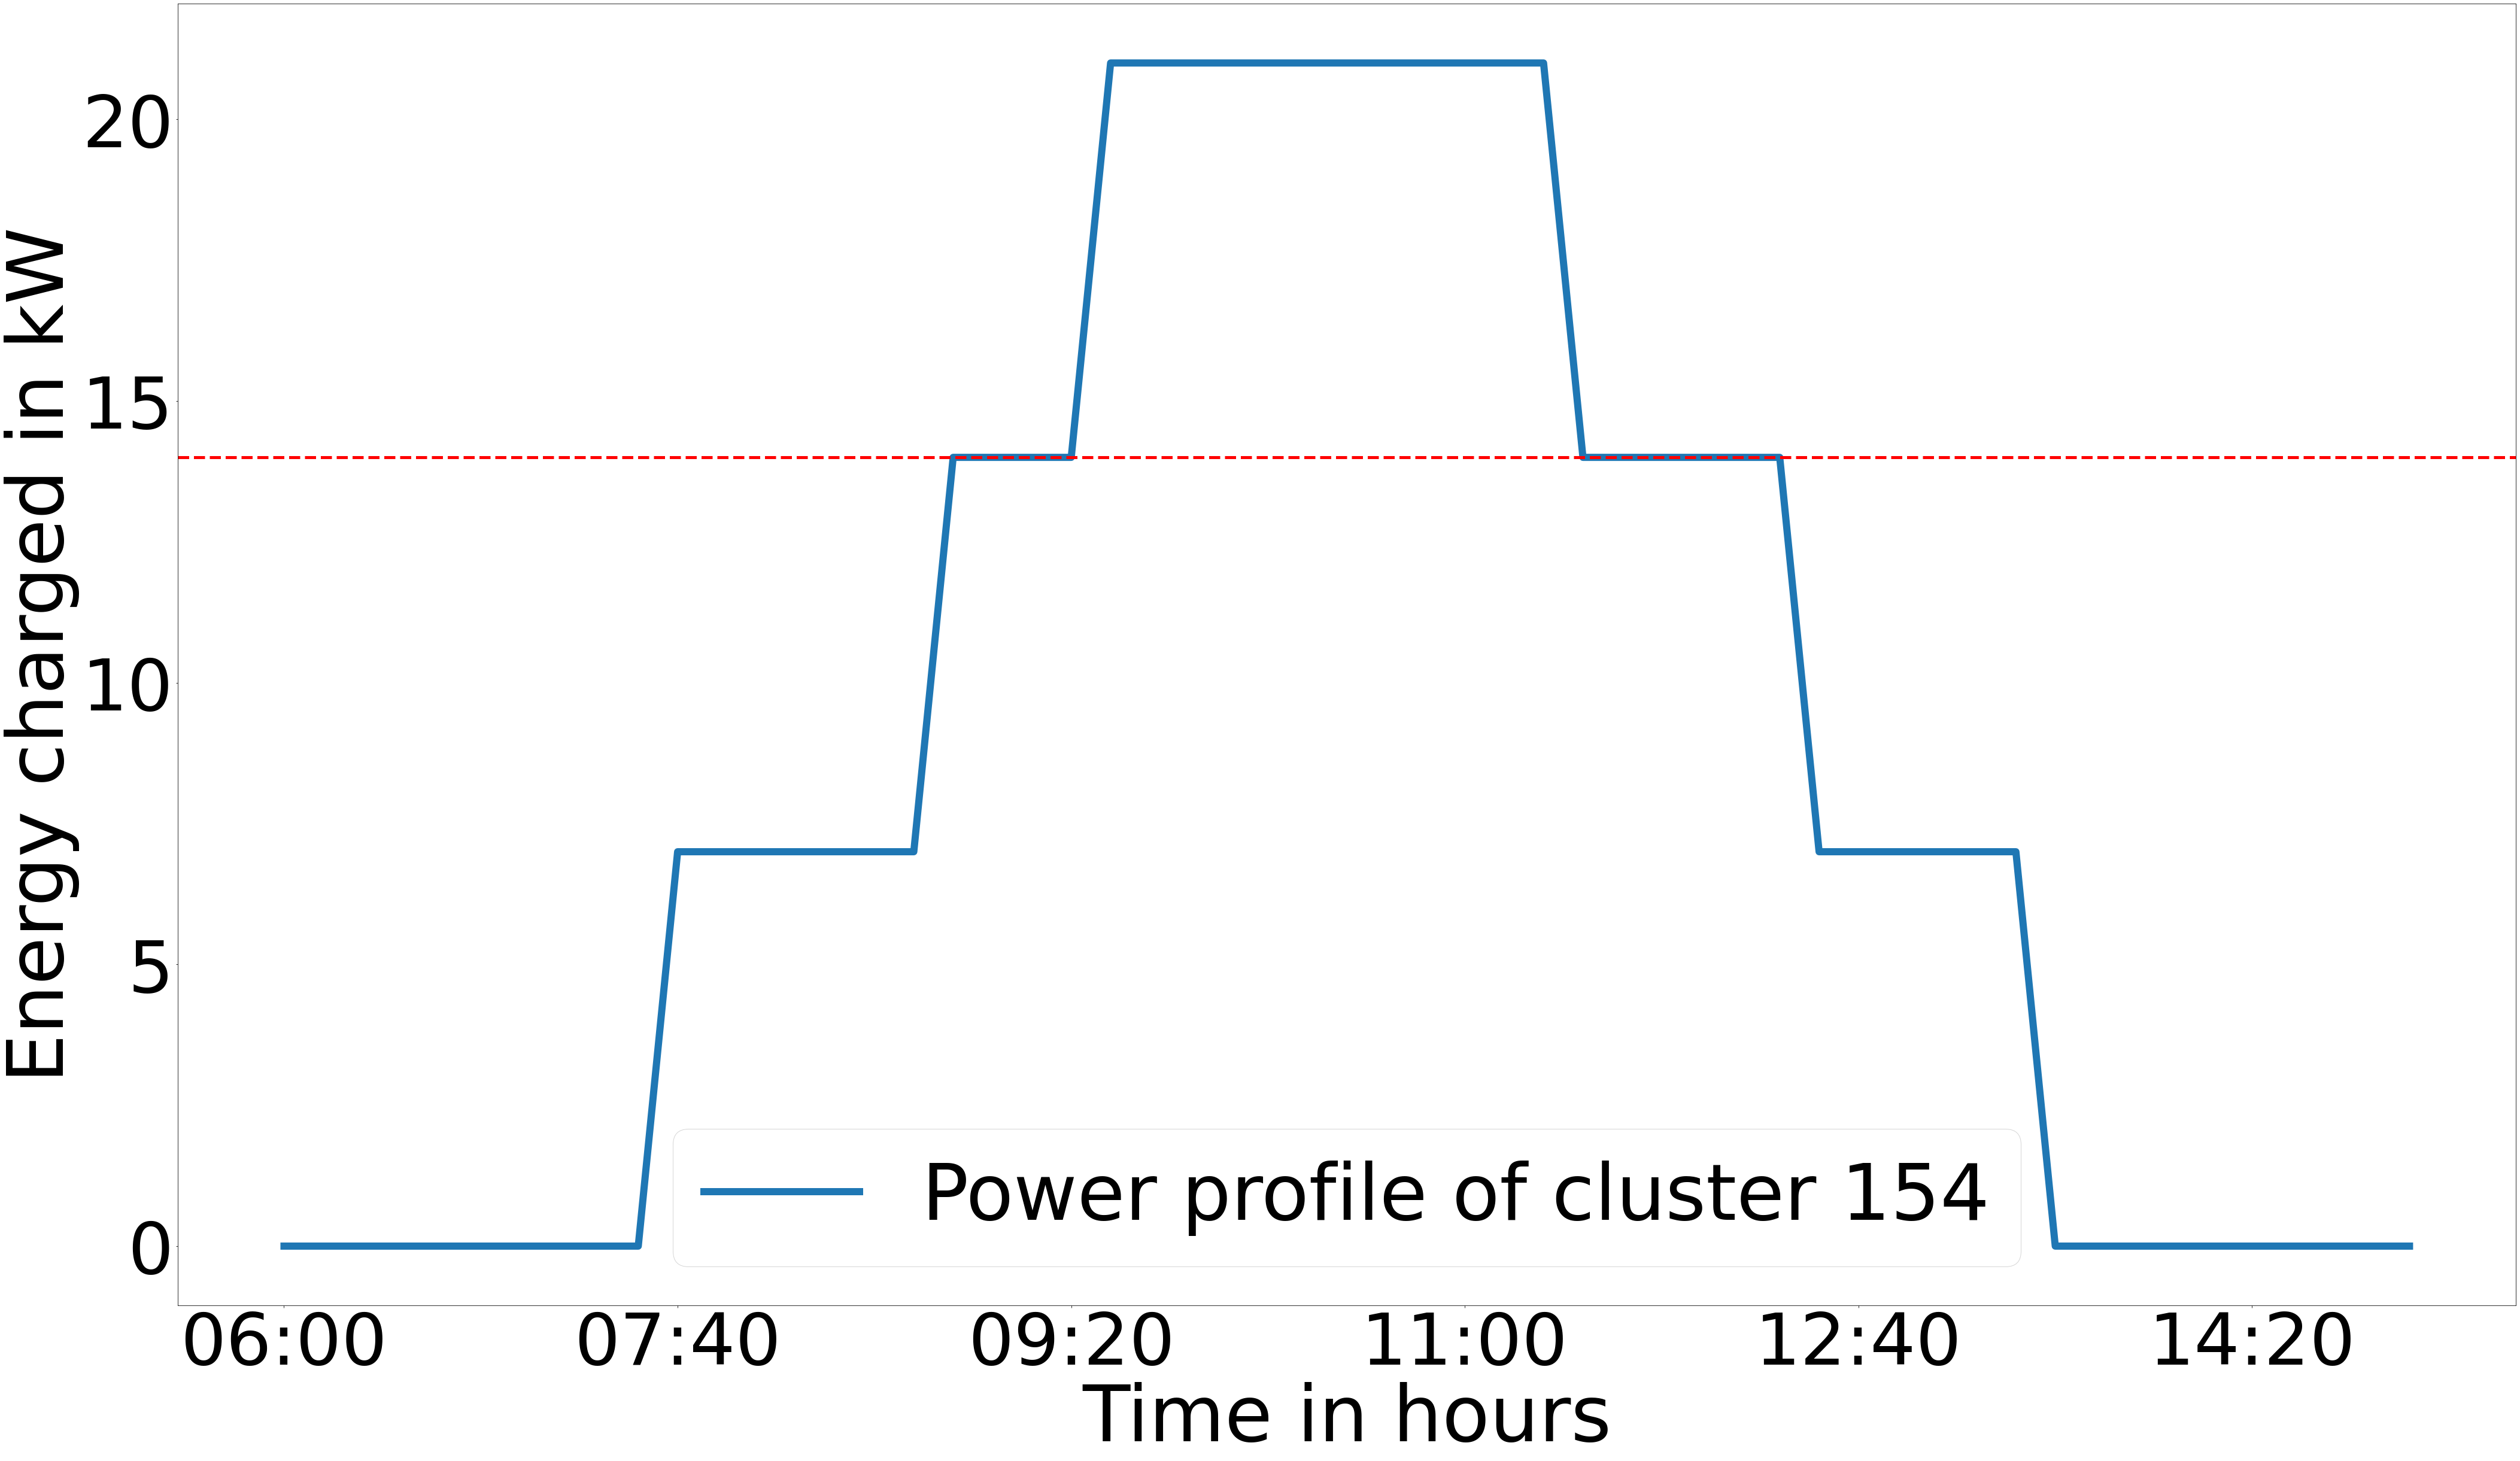

In [58]:
# Plot power profile of cluster 154
dft1.plot(x='step2', y='charging', kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(['Power profile of cluster 154'], fontsize=130)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
plt.axhline(y=14, color='r', linestyle='--', lw=5)
plt.show()

## Individual power profiles of the cluster

In [44]:
df_t1 = df_cluster
df_t1['hh10_ev31_work'] = df_t1['charging']
df_t1 = df_t1.drop(df_t1.columns[[1]], axis=1)
df_t1

,step,hh10_ev31_work
46,0,0
44,600,0
43,1200,0
42,1800,0
41,2400,0
40,3000,0
45,3600,0
39,4200,0
36,4800,0
35,5400,0


In [45]:
df_t2 = df_cluster2
df_t2['hh16_ev90_work'] = df_t2['charging']
df_t2 = df_t2.drop(df_t2.columns[[1]], axis=1)
df_t2

,step,hh16_ev90_work
23,9000,0
22,9600,0
0,10200,7
1,10800,7
2,11400,7
3,12000,7
4,12600,7
5,13200,7
6,13800,7
7,14400,7


In [46]:
df_t3 = df_cluster3
df_t3['hh8_ev45_work'] = df_t3['charging']
df_t3 = df_t3.drop(df_t3.columns[[1]], axis=1)
df_t3

,step,hh8_ev45_work
13,11400,0
12,12000,0
0,12600,7
1,13200,7
2,13800,7
3,14400,7
4,15000,7
5,15600,7
6,16200,7
7,16800,7


In [47]:
df_tall = pd.concat([df_t1, df_t2, df_t3])
df_tall

,step,hh10_ev31_work,hh16_ev90_work,hh8_ev45_work
46,0,0.0,NaN,NaN
44,600,0.0,NaN,NaN
43,1200,0.0,NaN,NaN
42,1800,0.0,NaN,NaN
41,2400,0.0,NaN,NaN
40,3000,0.0,NaN,NaN
45,3600,0.0,NaN,NaN
39,4200,0.0,NaN,NaN
36,4800,0.0,NaN,NaN
35,5400,0.0,NaN,NaN


In [48]:
df_tall = df_tall.sort_values('step')
df_tall

,step,hh10_ev31_work,hh16_ev90_work,hh8_ev45_work
46,0,0.0,NaN,NaN
44,600,0.0,NaN,NaN
43,1200,0.0,NaN,NaN
42,1800,0.0,NaN,NaN
41,2400,0.0,NaN,NaN
40,3000,0.0,NaN,NaN
45,3600,0.0,NaN,NaN
39,4200,0.0,NaN,NaN
36,4800,0.0,NaN,NaN
35,5400,0.0,NaN,NaN


In [49]:
df_tall = df_tall.fillna(0)
df_tall = df_tall.groupby('step').sum()
df_tall

,hh10_ev31_work,hh16_ev90_work,hh8_ev45_work
step,,,
0,0.0,0.0,0.0
600,0.0,0.0,0.0
1200,0.0,0.0,0.0
1800,0.0,0.0,0.0
2400,0.0,0.0,0.0
3000,0.0,0.0,0.0
3600,0.0,0.0,0.0
4200,0.0,0.0,0.0
4800,0.0,0.0,0.0


In [59]:
dft2 = df_tall
dft2["step2"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00"]
dft2 = dft2.sort_values("step2")
dft2

,hh10_ev31_work,hh16_ev90_work,hh8_ev45_work,step2
step,,,,
0,0.0,0.0,0.0,06:00
600,0.0,0.0,0.0,06:10
1200,0.0,0.0,0.0,06:20
1800,0.0,0.0,0.0,06:30
2400,0.0,0.0,0.0,06:40
3000,0.0,0.0,0.0,06:50
3600,0.0,0.0,0.0,07:00
4200,0.0,0.0,0.0,07:10
4800,0.0,0.0,0.0,07:20


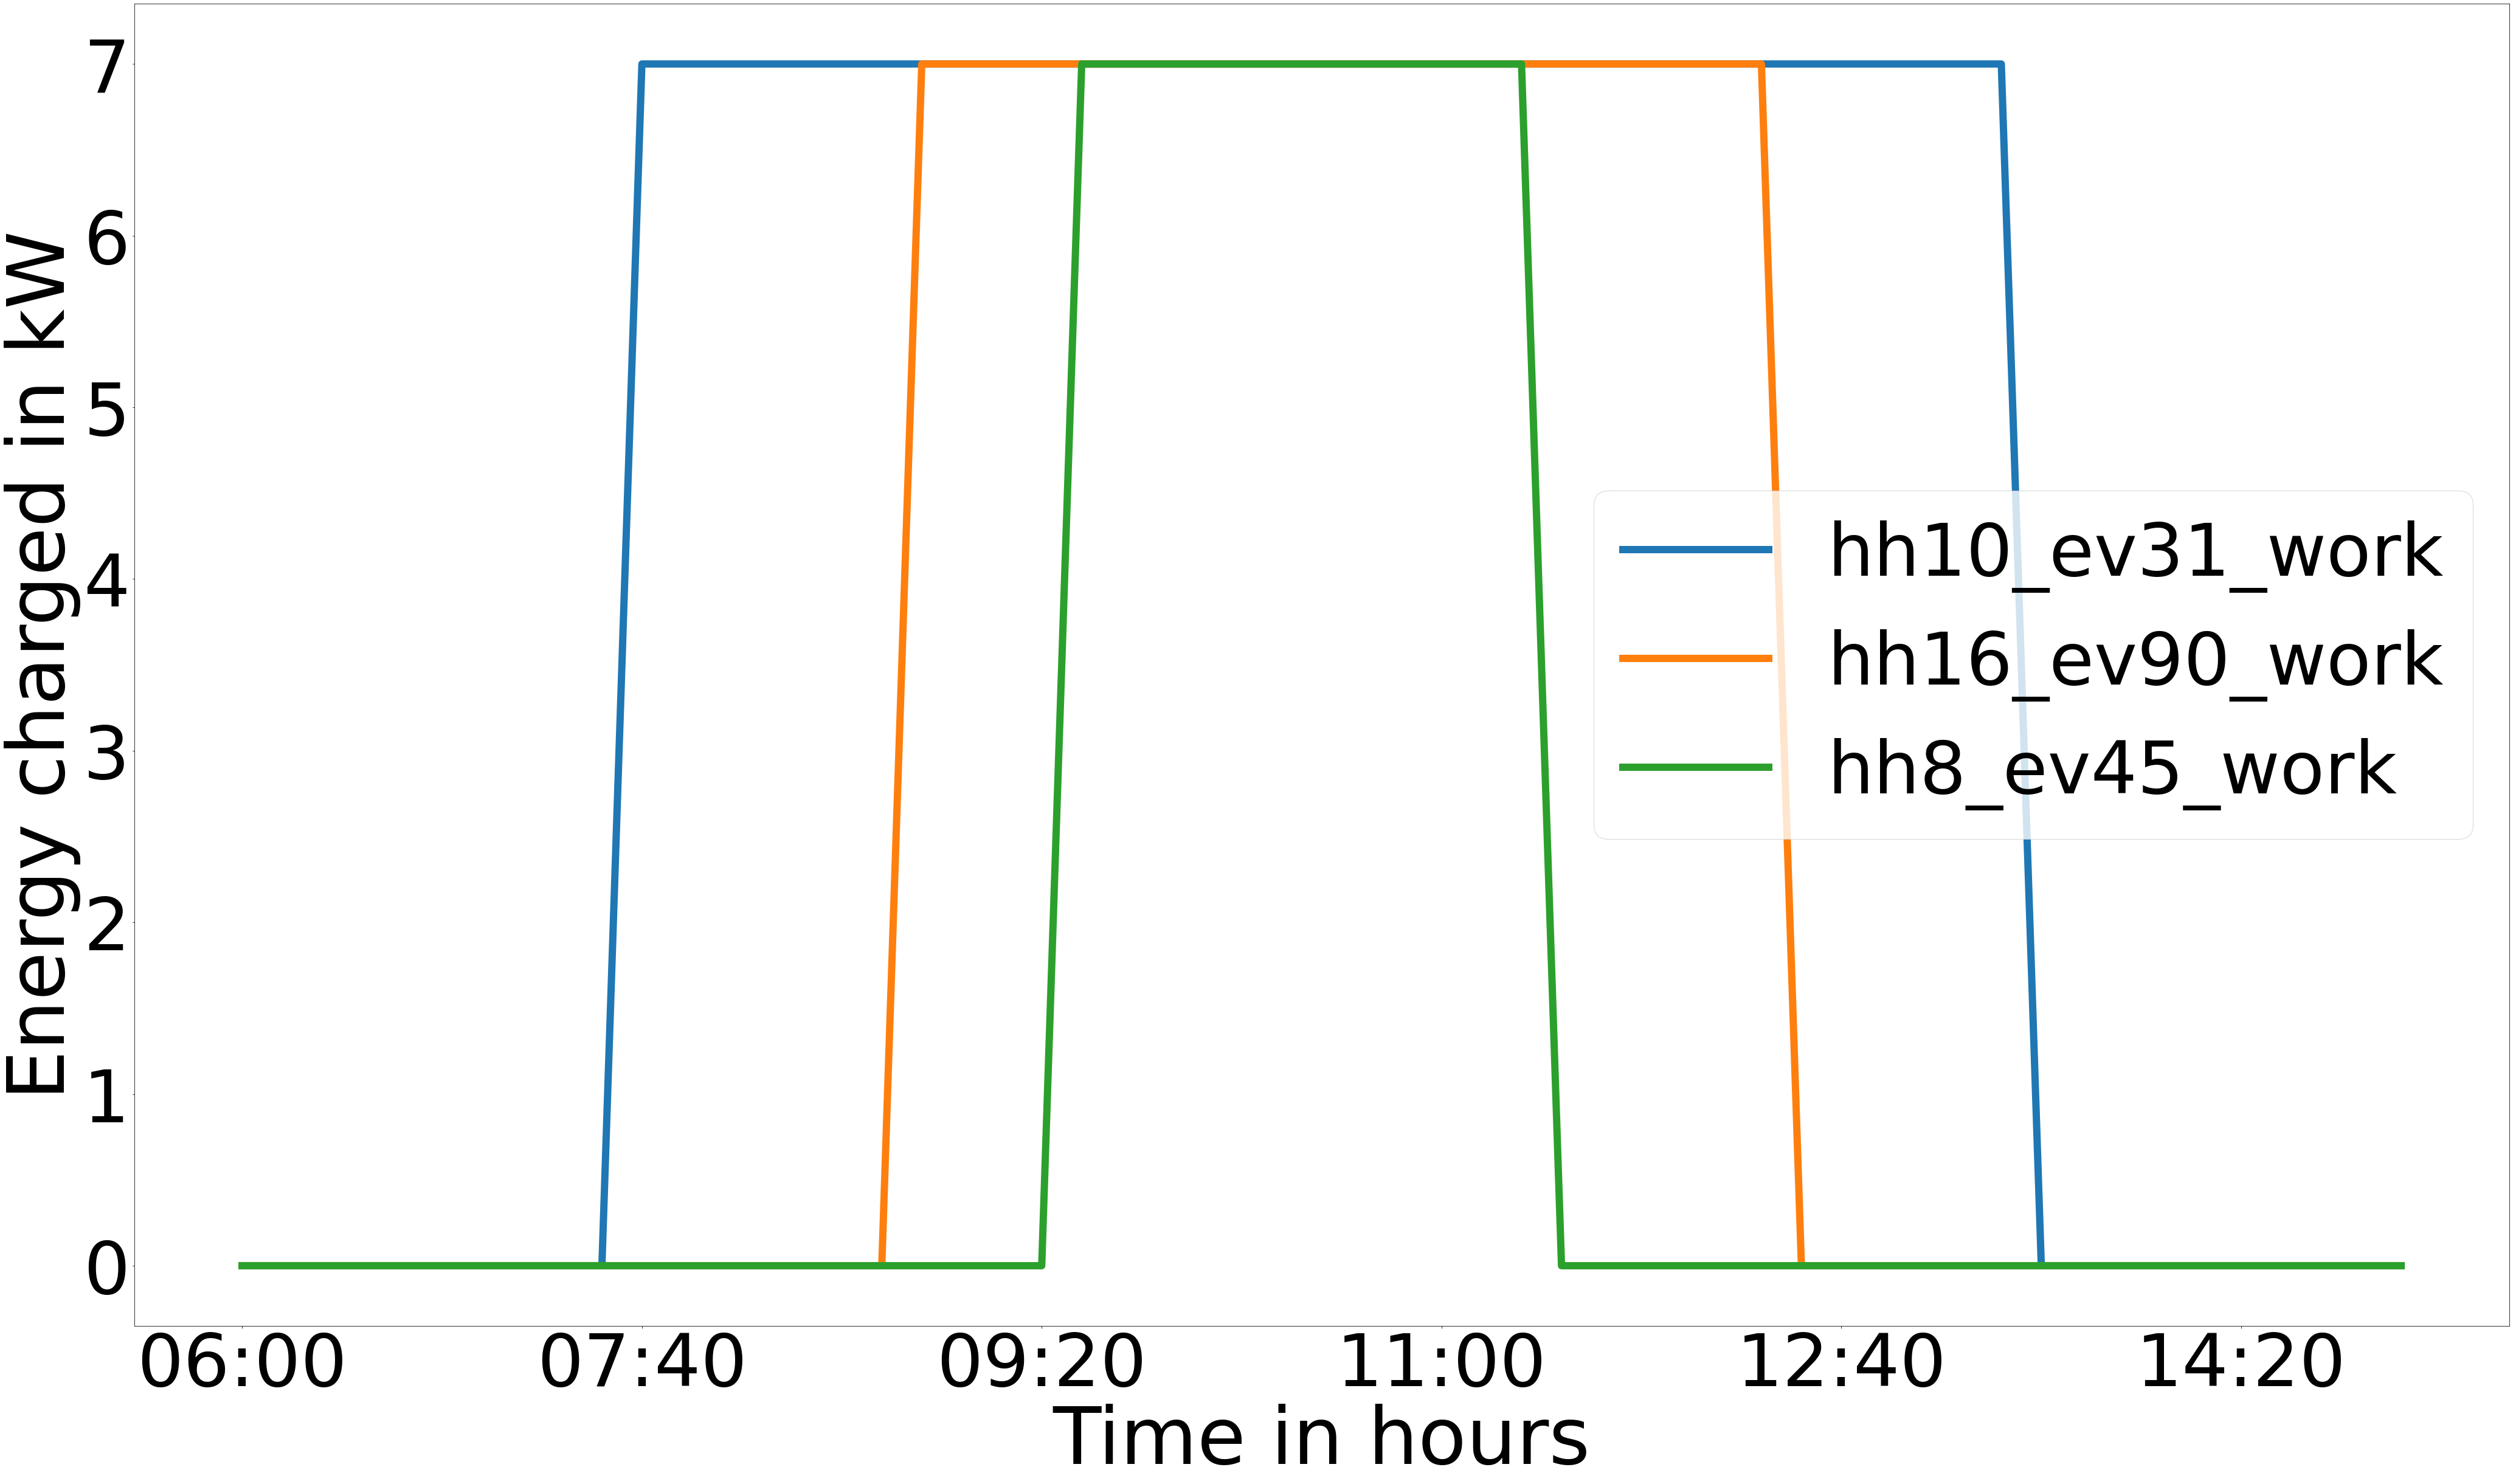

In [62]:
dft2.plot(x='step2', kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(fontsize=120)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

## Power profile of cluster 250

In [51]:
df_cluster4 = df_output
df_cluster4 = df_cluster4.loc[df_cluster4['status'] == "charging"]
df_cluster4 = df_cluster4[df_cluster4['charging_station'] == "hh16_ev74_work"]
df_cluster4 = df_cluster4.groupby(['step']).size().reset_index(name="count")
df_cluster4['charging'] = df_cluster4['count'] * 7
df_cluster4 = df_cluster4.drop(df_cluster4.columns[[1]], axis=1)
df_cluster4

,step,charging
0,10800,7
1,11400,7
2,12000,7
3,12600,7
4,13200,7
5,13800,7
6,14400,7
7,15000,7
8,15600,7
9,16200,7


In [52]:
new_row1 = {'step':10200, 'charging':0}
new_row2 = {'step':9600, 'charging':0}
new_row3 = {'step':23400, 'charging':0}
new_row4 = {'step':24000, 'charging':0}
#append row to the dataframe
df_cluster4 = df_cluster4.append(new_row1, ignore_index=True)
df_cluster4 = df_cluster4.append(new_row2, ignore_index=True)
df_cluster4 = df_cluster4.append(new_row3, ignore_index=True)
df_cluster4 = df_cluster4.append(new_row4, ignore_index=True)
df_cluster4 = df_cluster4.sort_values('step')
df_cluster4

,step,charging
22,9600,0
21,10200,0
0,10800,7
1,11400,7
2,12000,7
3,12600,7
4,13200,7
5,13800,7
6,14400,7
7,15000,7


In [64]:
dft3 = df_cluster4
dft3["step2"] = ["08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40"]
dft3 = dft3.sort_values("step2")
dft3

,step,charging,step2
22,9600,0,08:40
21,10200,0,08:50
0,10800,7,09:00
1,11400,7,09:10
2,12000,7,09:20
3,12600,7,09:30
4,13200,7,09:40
5,13800,7,09:50
6,14400,7,10:00
7,15000,7,10:10


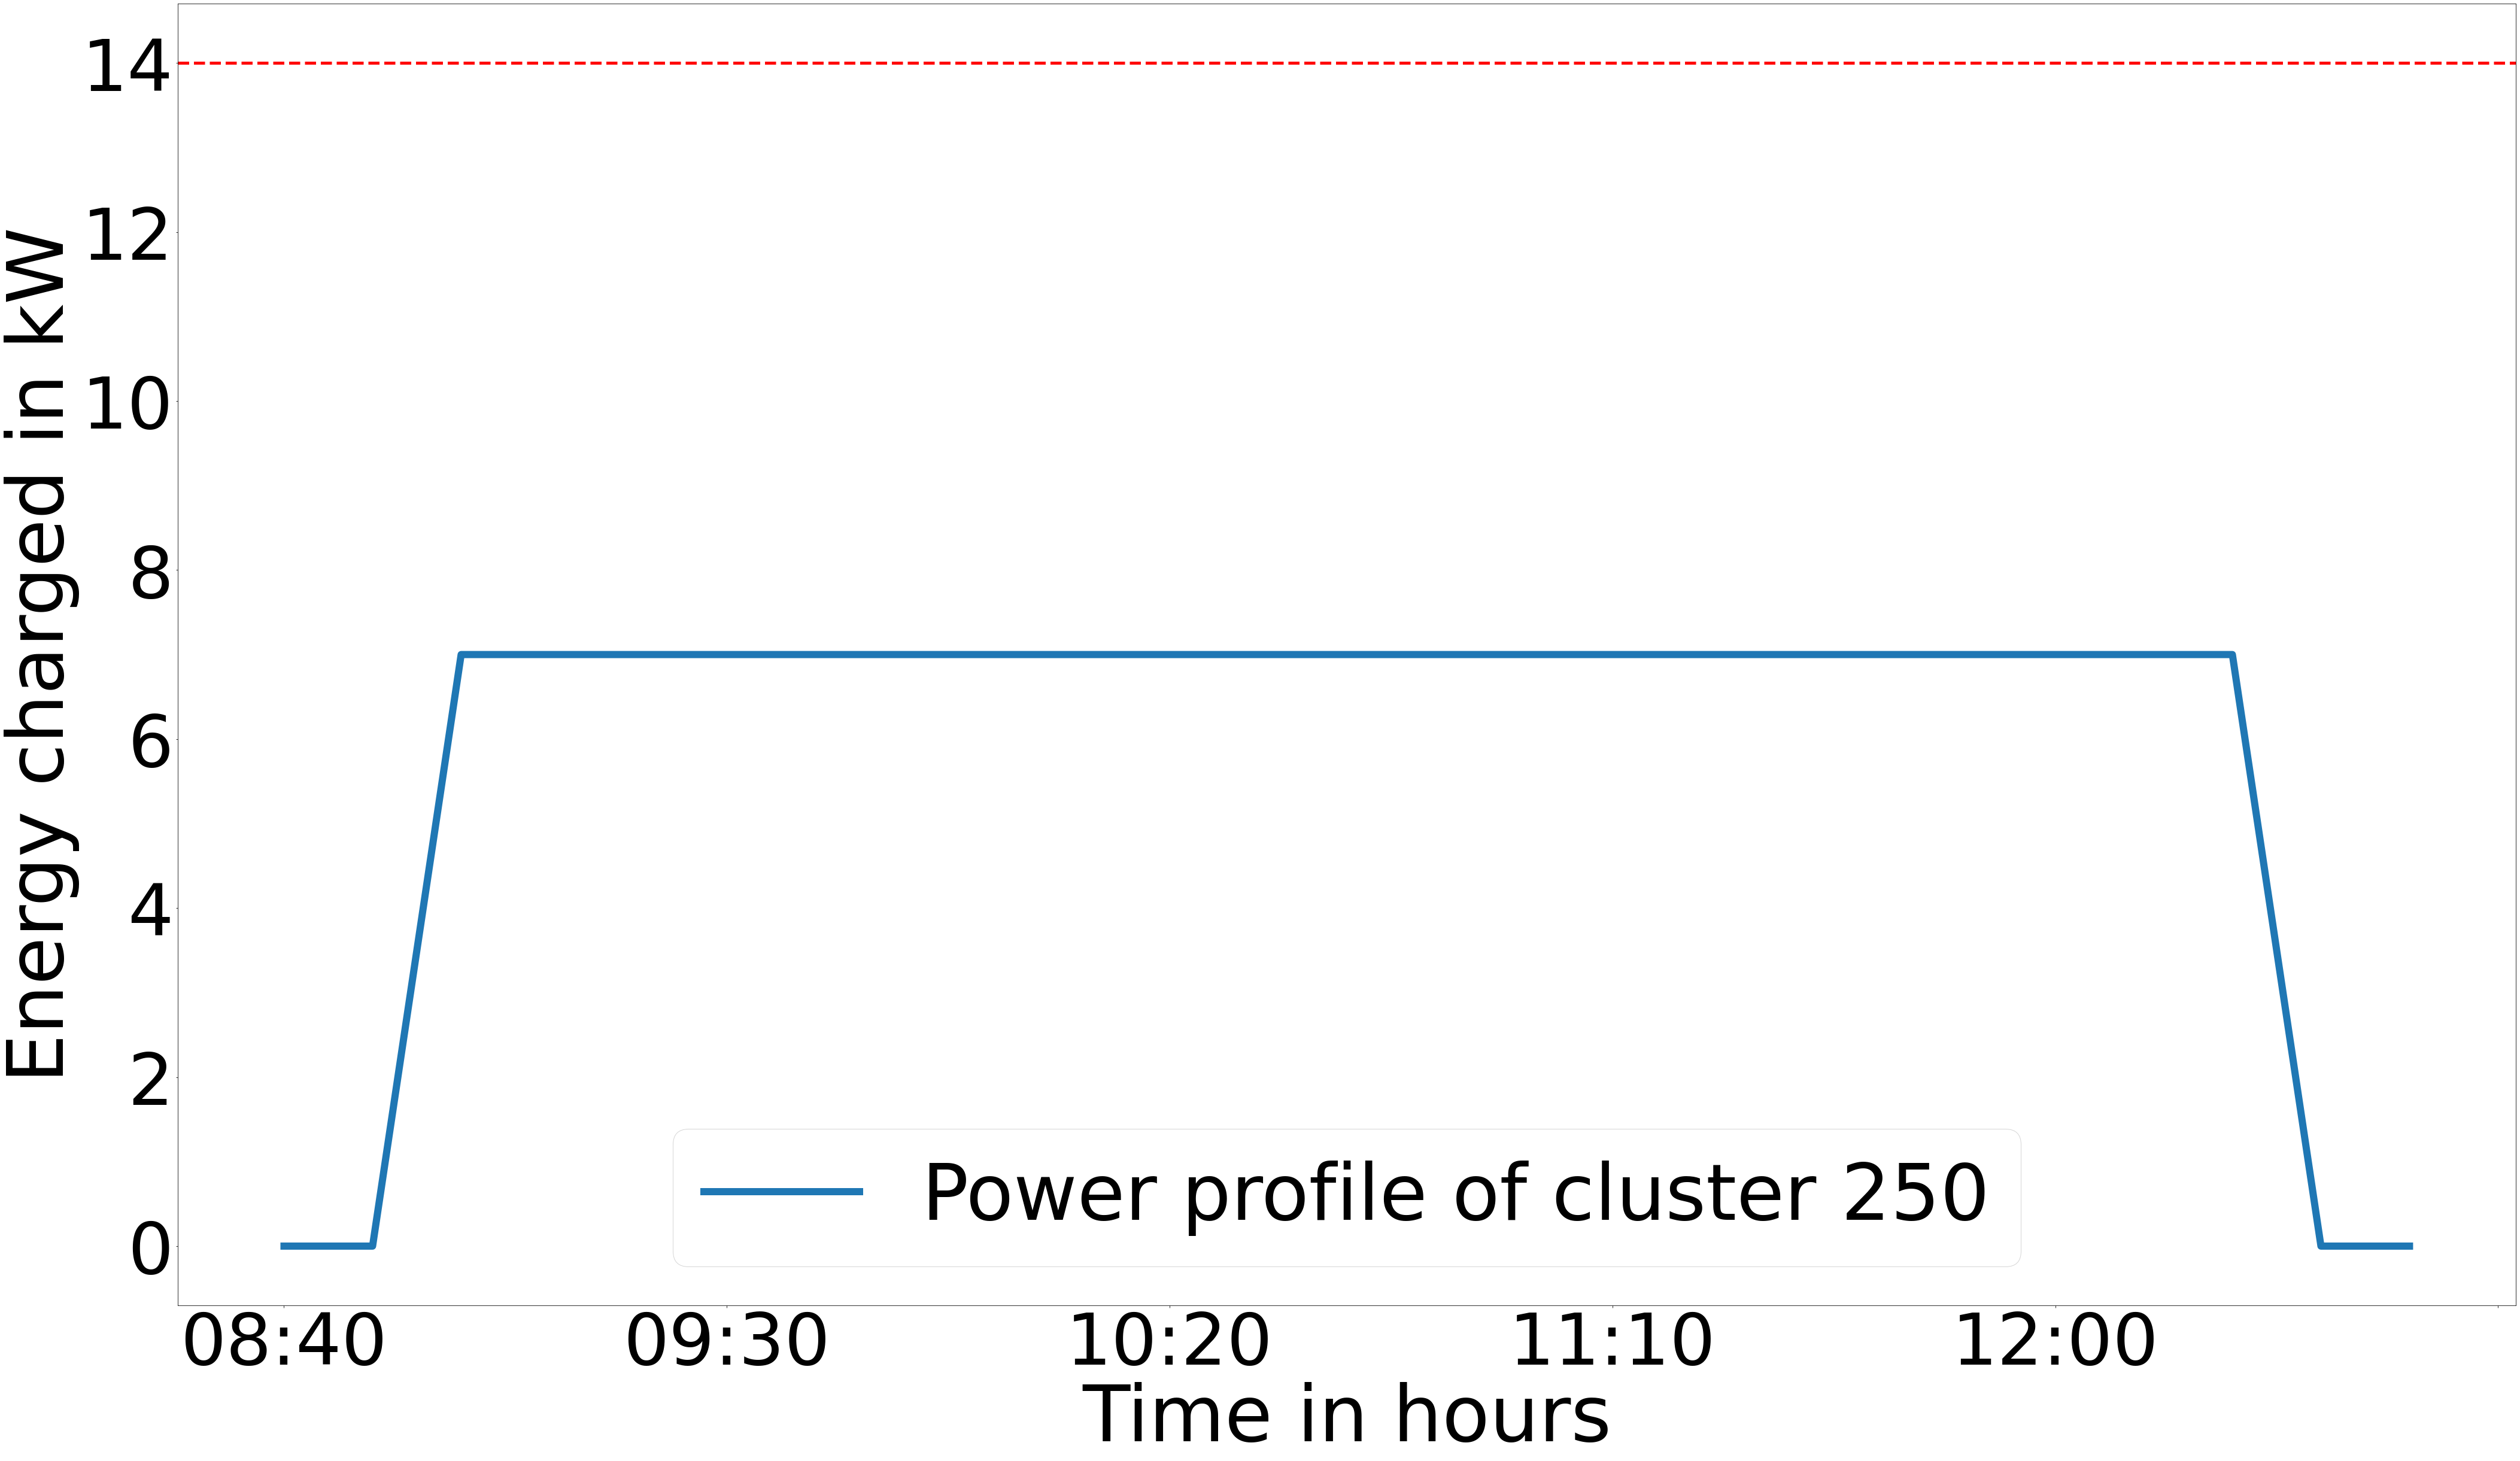

In [65]:
dft3.plot(x ='step2', y='charging', kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(['Power profile of cluster 250'], fontsize=130)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
plt.axhline(y=14, color='r', linestyle='--', lw=5)
plt.show()